# YASWANTH AINAKOTA

# Grip March 2023 internship

# Task 4:- Exploratory Data Analysis - Terrorism

Exploratory Data Analysis' should be run on the dataset 'World Terrorism'. Try to identify the terrorist hotspots as a security/defense analyst and provide them.

# Importing Required Libraries

In [1]:
import math
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
Data_Ter = pd.read_csv(r'C:/Users/ainak.YASWANTH/Desktop/Dataset/globalterrorism.csv', encoding="ISO-8859-1")
Data_Ter.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
Data_Ter.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
Data_Ter.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [5]:
Data_Ter.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
# Checking For Null Values
Data_Ter.isnull().sum()

eventid            0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
# Taking the columns which are useful and neglecting the unwanted columns from the data given.
Data_Ter=Data_Ter[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [8]:
Data_Ter.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [9]:
# Checking For Null Values
Data_Ter.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [10]:
Data_Ter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [11]:
print("Country with the most attacks:",Data_Ter['Country'].value_counts().idxmax())
print("City with the most attacks:",Data_Ter['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",Data_Ter['Region'].value_counts().idxmax())
print("Year with the most attacks:",Data_Ter['Year'].value_counts().idxmax())
print("Month with the most attacks:",Data_Ter['Month'].value_counts().idxmax())
print("Group with the most attacks:",Data_Ter['Group'].value_counts().index[1])
print("Most Attack Types:",Data_Ter['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


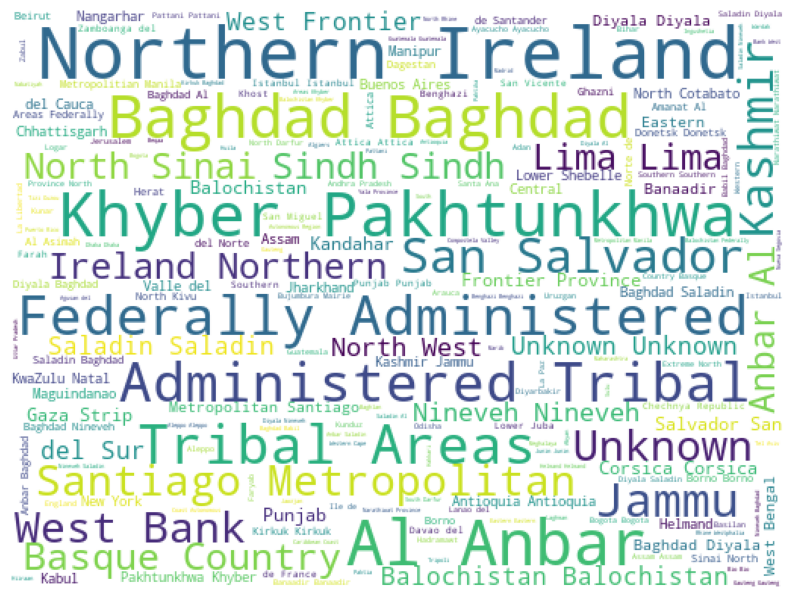

In [12]:
from wordcloud import WordCloud
from scipy import signal
City = Data_Ter.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',width = 512,height = 384).generate(' '.join(City))
plt.axis('off')
plt.imshow(wordcloud)

In [13]:
Data_Ter['Year'].value_counts().sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

# Exploratory Data Analysis

<AxesSubplot: >

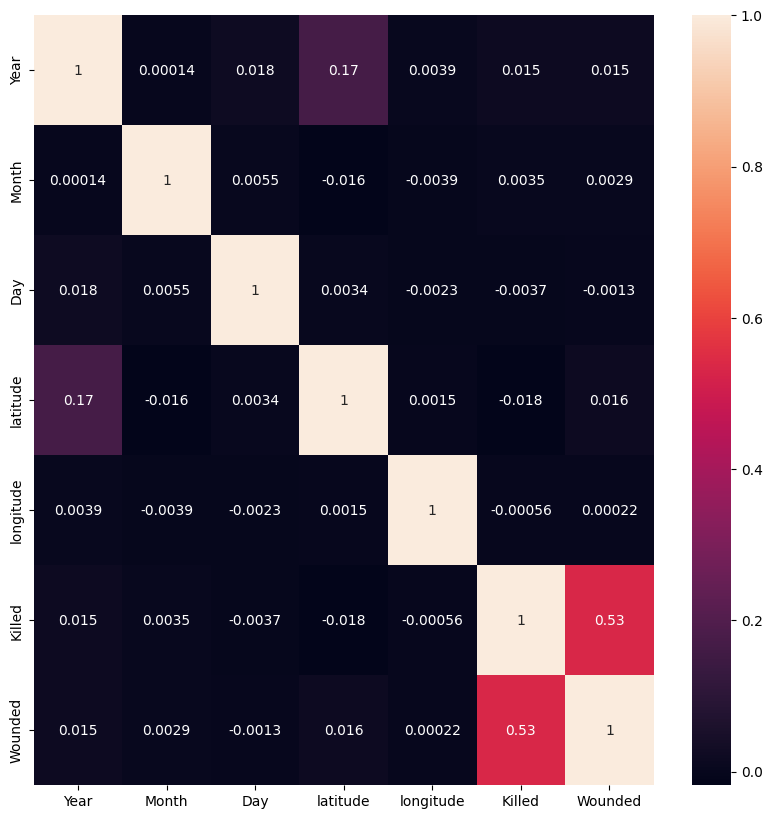

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(Data_Ter.corr(), annot=True)

Text(0, 0.5, 'Number of attacks per year')

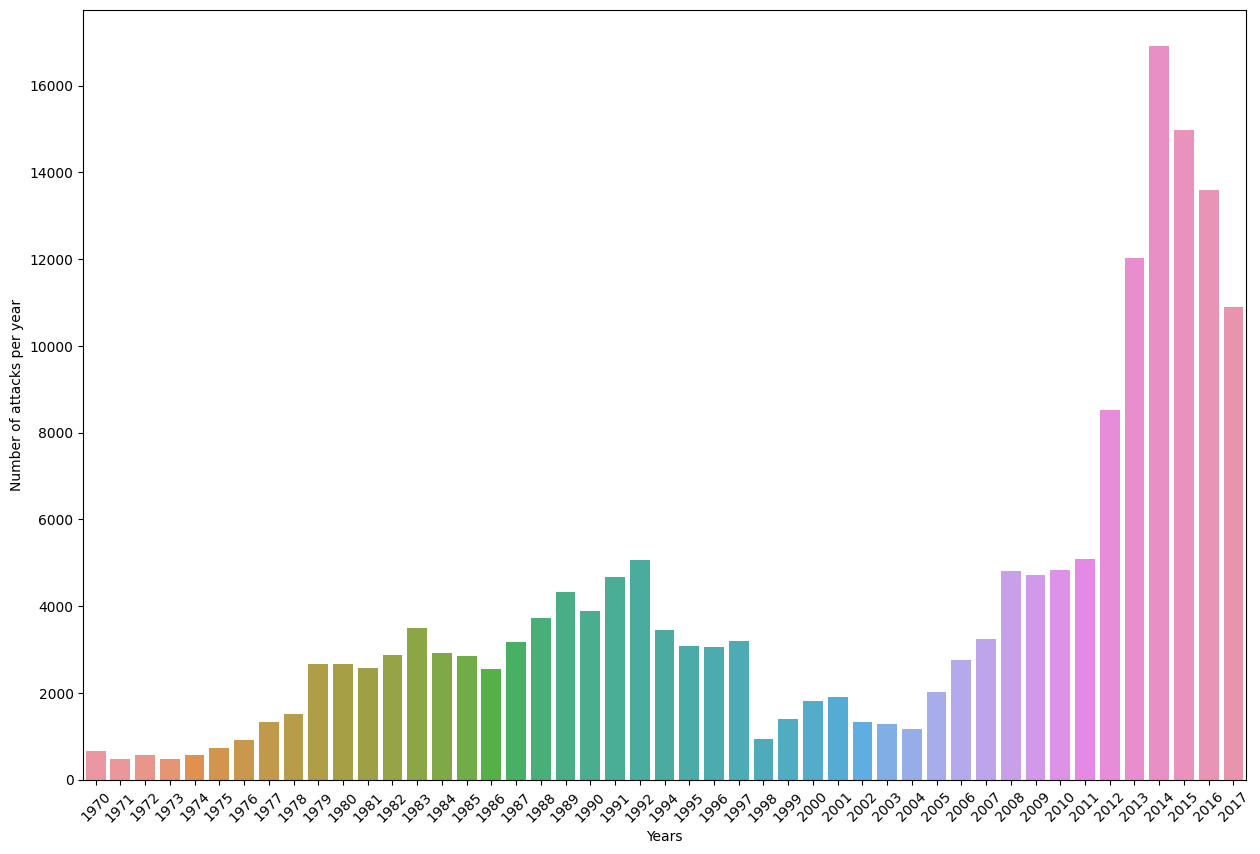

In [15]:
Ter_year = Data_Ter['Year'].unique()
Ter_count_year = Data_Ter['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize=(15,10))
sns.barplot(x=Ter_year, y=Ter_count_year)
plt.xticks(rotation = 45)
plt.xlabel('Years')
plt.ylabel('Number of attacks per year')

2014 had the largest number of attacks (34042642) and was 3,567.04% higher than 1971, which had the lowest number of attacks (928341), a difference of 3,567.04%. 9.36% of the total for the year came from 2014. Attacks per year ranged from 928341 to 34042642 for all 47 years.

Text(0, 0.5, 'Number of Attacks')

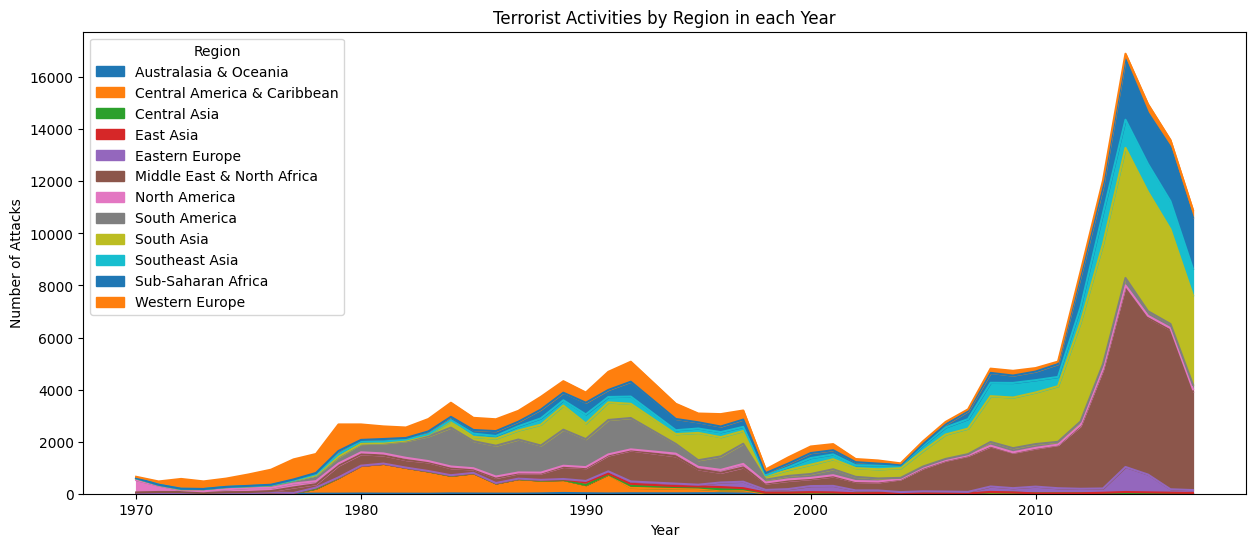

In [16]:
pd.crosstab(Data_Ter.Year, Data_Ter.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')

In [17]:
Data_Ter['Wounded'] = Data_Ter['Wounded'].fillna(0).astype(int)
Data_Ter['Killed'] = Data_Ter['Killed'].fillna(0).astype(int)
Data_Ter['casualities'] = Data_Ter['Killed'] + Data_Ter['Wounded']

In [18]:
Year=Data_Ter.Year.value_counts().to_dict()
rate=((Year[2017]-Year[1970])/Year[2017])*100
print(Year[1970],'attacks happened in 1970 ')
print(Year[2017],'attacks happened in 2017')
print('Total number of attacks from 1970 has increased by',np.round(rate,0),'% till 2017')

651 attacks happened in 1970 
10900 attacks happened in 2017
Total number of attacks from 1970 has increased by 94.0 % till 2017


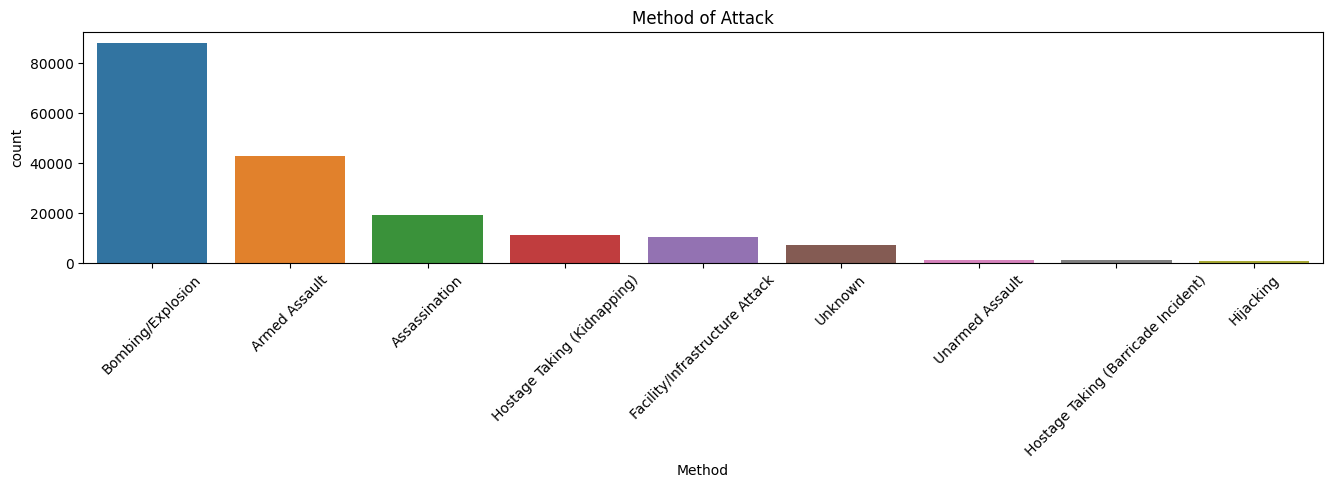

In [19]:
plt.figure(figsize=(16,3))
sns.countplot(x = Data_Ter['AttackType'], order = Data_Ter['AttackType'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

The graph dipicts the method of attacks used by the terroists.

The graph is plot between two attributes which are count of the attacks and the way the terrorists attacked. It is observed that the terrorists practiced 9 ways of attacks on the citizens where the they used hostage taking in two ways (kidnaping and Barricade Incident).

It is noted that there were two unknown methods of attacking "Unknown attacks" and "Unknown Assault".

The most common method of attack was Bombing/Explosion with more than 80000 attacks and the second most choosen way of attacking is Armed assualt with over 40000 attacks. The least opted method of attacking was unamed assault Hostage Taking(Barricade Incident) and Hijacking, which have almost the same number attacks.

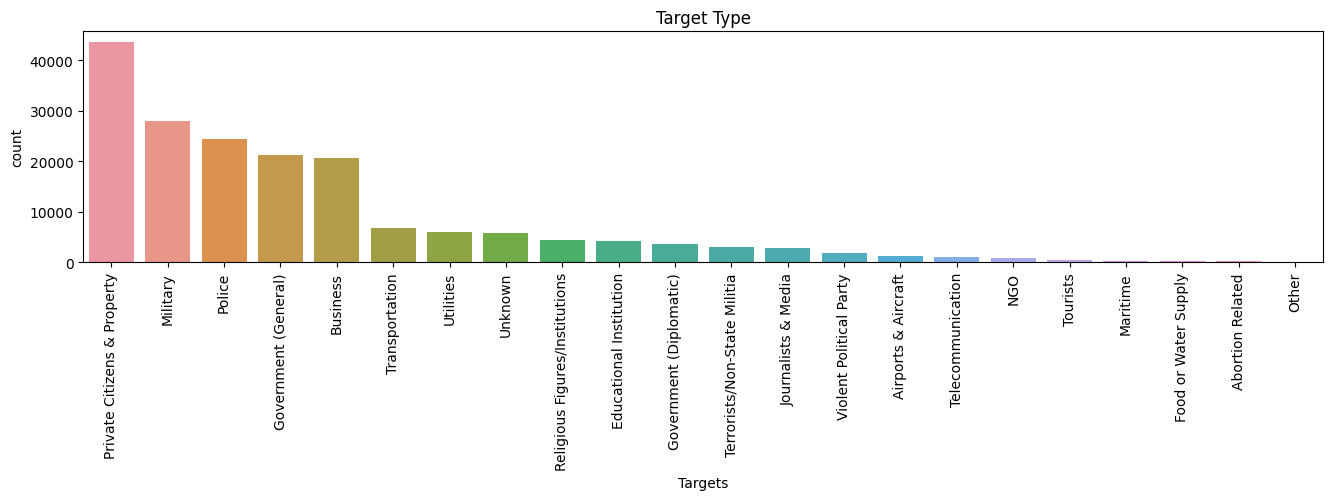

In [20]:
plt.figure(figsize=(16,3))
sns.countplot(x = Data_Ter['Target_type'], order = Data_Ter['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Targets')
plt.title('Target Type')
plt.show()

Civilians are attacked most in a terrorist act over 40000. Armed forces and police are next most chosen target with over 25000 attacks. It was also observed that government sector and business sector were equally targeted by terrorists exceeding 20000 attacks. Other target types have been attacked less than 10000 times. The least attacked type of target are NGO, tourists, Maritime, food or water supply, abortion related and other with less than 5000 attacks.

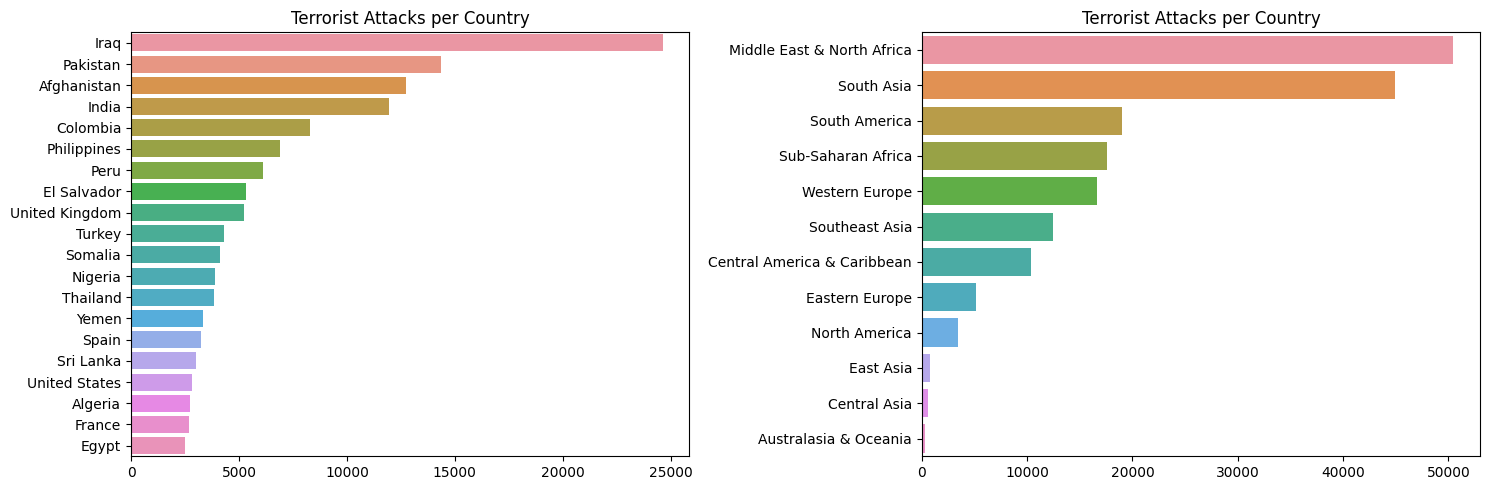

In [21]:
fig,axes = plt.subplots(figsize=(15,5),nrows = 1, ncols=2)
sns.barplot(x = Data_Ter['Country'].value_counts()[:20].values, y=Data_Ter['Country'].value_counts()[:20].index, ax = axes[0])
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x = Data_Ter['Region'].value_counts()[:20].values, y=Data_Ter['Region'].value_counts()[:20].index, ax = axes[1])
axes[1].set_title('Terrorist Attacks per Country')
fig.tight_layout()
plt.show()

In [22]:
Data_Ter['Target']

0                    Julio Guzman
1         Nadine Chaval, daughter
2                        Employee
3                    U.S. Embassy
4                  U.S. Consulate
                   ...           
181686                 Checkpoint
181687           Hmeymim Air Base
181688                     Houses
181689                     Office
181690                    Unknown
Name: Target, Length: 181691, dtype: object

In [23]:
df=Data_Ter.groupby(['Country'],as_index=False).count()

In [27]:
max_count=df['Year'].max()
max_name=df['Country'][max_id]
min_count=df['Year'].min()
min_name=df['Country'][min_id]

print(max_name,'has suffered the maximum number of terror attacks of',max_count)
print(min_name,'has suffered the minimum number of terror attacks of',min_count)

Iraq has suffered the maximum number of terror attacks of 24636
Andorra has suffered the minimum number of terror attacks of 1


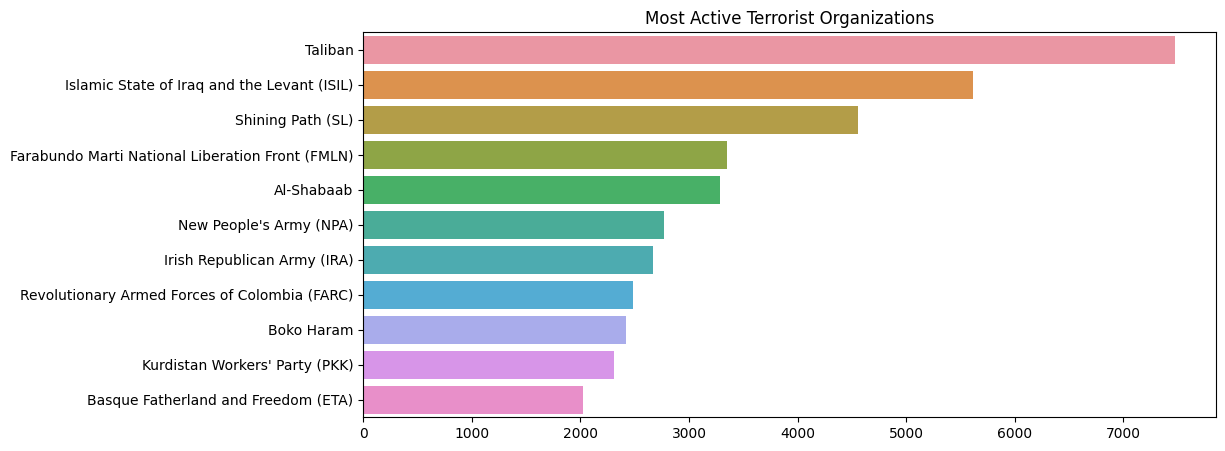

In [30]:
plt.subplots(figsize=(11,5))
sns.barplot(y=Data_Ter['Group'].value_counts()[1:12].index,x=Data_Ter['Group'].value_counts()[1:12].values)
plt.title('Most Active Terrorist Organizations')
plt.show()

The above 

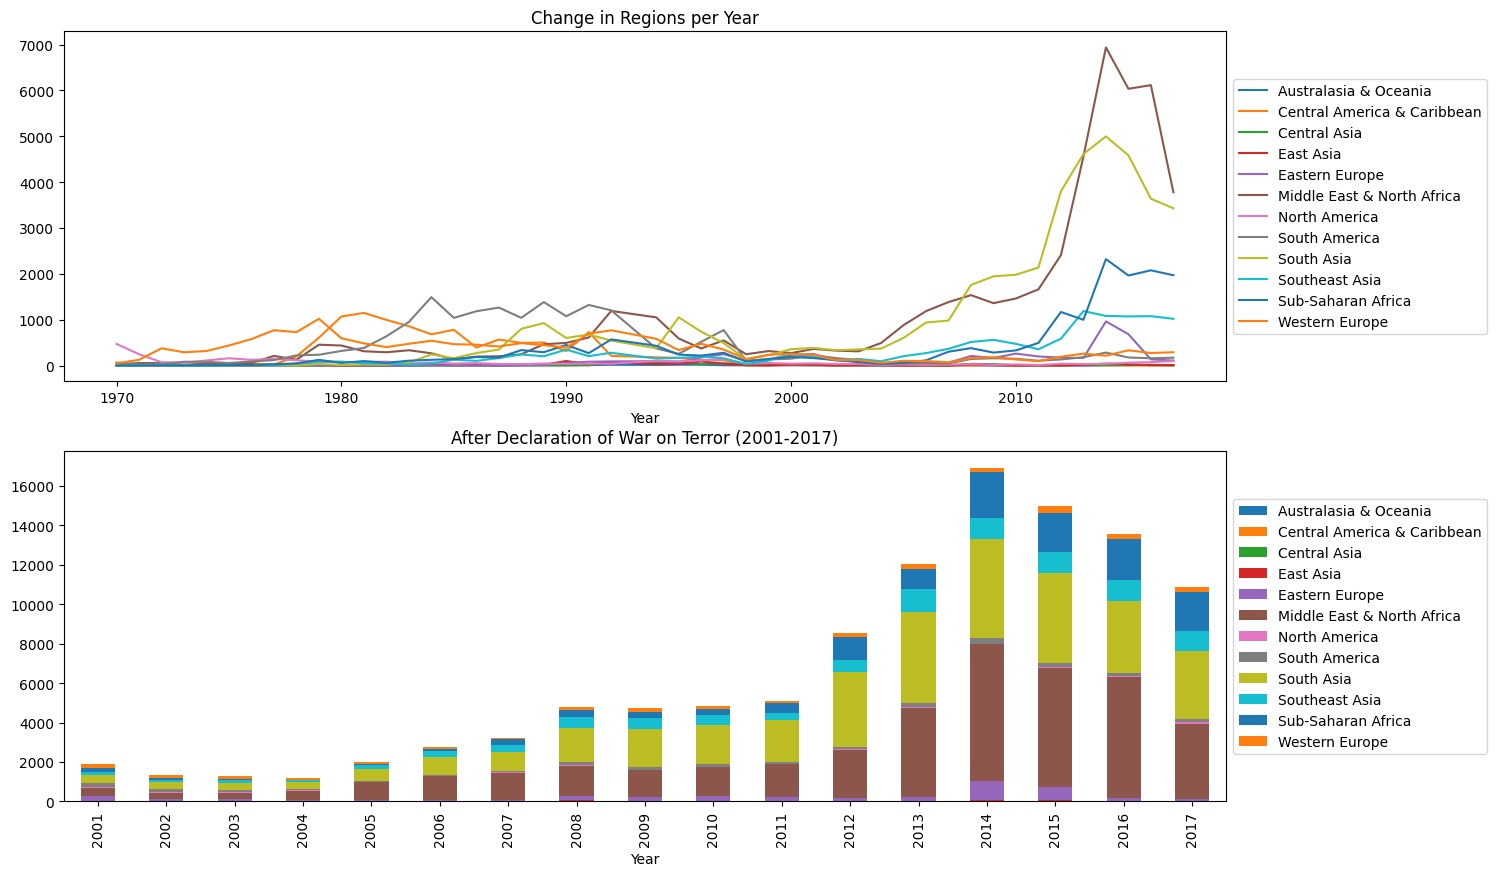

In [37]:
data_after = Data_Ter[Data_Ter['Year']>=2001]
fig,ax = plt.subplots(figsize=(15,10), nrows=2, ncols=1)
ax[0] = pd.crosstab(Data_Ter.Year, Data_Ter.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left', bbox_to_anchor = (1,0.5))
pd.crosstab(data_after.Year,data_after.Region).plot.bar(stacked=True, ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left', bbox_to_anchor = (1,0.5))
plt.show()

In [54]:
print('Region with highest attacks:-  \t\t\t ', Data_Ter['Region'].value_counts().index[0])
print('Country with highest number of attacks overall:- ',Data_Ter['Country'].value_counts().index[0])
print('Total Number of caualities took place :- \t ',Data_Ter['Killed'].sum())

Region with highest attacks:-  			  Middle East & North Africa
Country with highest number of attacks overall:-  Iraq
Total Number of caualities took place :- 	  411868


# Critical Observations and insights:- 

1. The Middle East and North Africa are where terrorism occurs most frequently.

2. Attacks in South Africa and the Middle East have risen since 2010.

3. Since the 2000s, terrorist organizations have begun to use airports, aircraft, and the military as their primary target categories.

4. Iraq has experienced the most terror strikes.

5. There have been the fewest terror incidents in Andorra.

6. Compared to other individuals, private citizens and property are frequently targeted by terrorists.

7. Up until 2017, the overall number of attacks has dramatically grown since 1970.

8. Terrorist actions are prevalent in Southeast Asia, South Asia, and Australia.

9. Attacks by terrorists have deadly repercussions in both the Middle East and North America.

10. There are reportedly significant attack locations in the Middle East and North Africa.

11. The majority of these assaults target Muslims..

12. The nations with the most harm are Pakistan, Afghanistan, and Iraq.


# Thank You